In [2]:
%load_ext autoreload
%autoreload 2


In [29]:
#Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DatasetManager import DatasetManager

dataset_manager = DatasetManager()
dataset_manager.load_dataframe('all','../all-data.csv')
dataset_manager.active_dataframe.head()






,label,news
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


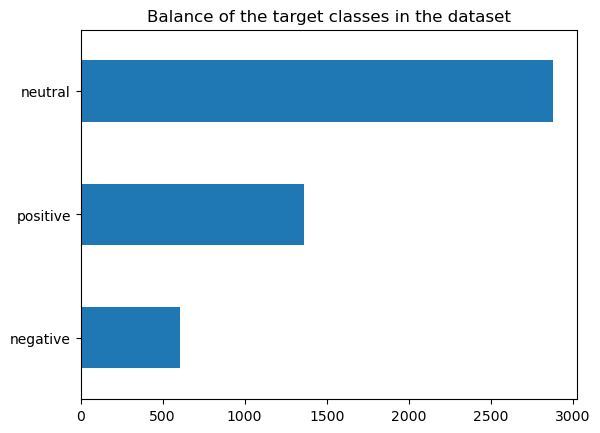

neutral     2879
positive    1363
negative     604
Name: label, dtype: int64


In [30]:
dataset_manager.check_balance()
